# Comando da Questão A: sample distribution and sampling distribution

A partir do que foi feito na Atividade 2 “Considerando o primeiro trabalho, defina um experimento em que dados são coletados de uma variável de interesse do seu trabalho”, crie  uma população artificial dessa variável com uma distribuição Gaussiana e demonstre sample distribution and sampling distribution. Faça avaliações de probabilidade de possíveis eventos.


Vamos assumir que, na _população_ de todos os possíveis usos dessa ferramenta para a tarefa específica por todos os desenvolvedores potenciais, o tempo de conclusão segue uma Distribuição Gaussiana (Normal).

Para isso, vamos criar uma grande população artificial para simular todos os tempos possíveis, seguindo a distribuição Normal que foi definida anteriormente:

Média Populacional (μ): 30 minutos

Desvio Padrão Populacional (σ): 5 minutos

Tamanho da População (Simulada): N=100,000 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import pandas as pd

# Parâmetros da População
pop_mean = 30  # mu
pop_std_dev = 5 # sigma
population_size = 100000

# Gerar a população artificial
np.random.seed(42) # Para reprodutibilidade
population_times = np.random.normal(loc=pop_mean, scale=pop_std_dev, size=population_size)

# Plotar a distribuição da população
plt.figure(figsize=(10, 6))
plt.hist(population_times, bins=50, density=True, alpha=0.7, color='gray', label=f'População (N={population_size})')
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x, pop_mean, pop_std_dev)
plt.plot(x, p, 'k', linewidth=2, label=f'Distribuição Normal Teórica\n($\mu={pop_mean}, \sigma={pop_std_dev}$)')
plt.title('Distribuição da População Artificial\n(Tempo de Conclusão da Tarefa - Minutos)')
plt.xlabel('Tempo de Conclusão (minutos)')
plt.ylabel('Densidade de Probabilidade')
plt.legend()
plt.grid(axis='y', alpha=0.5)
plt.show()

print(f"Média da População Simulada: {np.mean(population_times):.4f} (Esperado: {pop_mean})")
print(f"Desvio Padrão da População Simulada: {np.std(population_times):.4f} (Esperado: {pop_std_dev})")

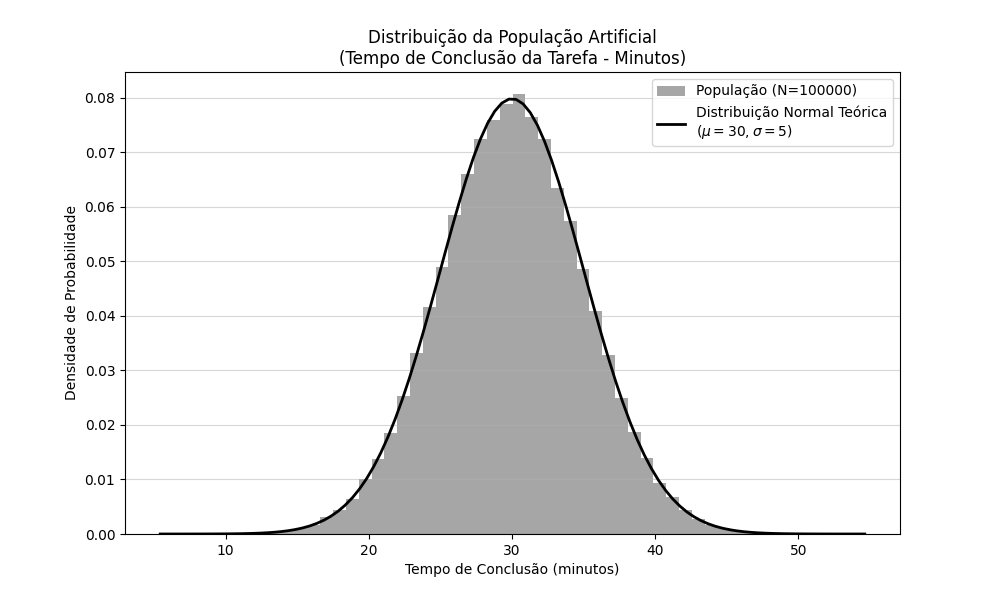

O histograma da população se assemelha muito à curva Normal teórica, como esperado .A média e o desvio padrão da população simulada são muito próximos dos valores teóricos μ=30 e σ=5.

Em um estudo real, não temos acesso a toda a população. Coletamos uma *amostra*. Vamos simular a coleta de uma amostra de n=30 desenvolvedores. A distribuição dos tempos dentro dessa amostra específica é a distribuição da amostra.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import pandas as pd

# Parâmetros da População
pop_mean = 30  # mu
pop_std_dev = 5 # sigma
population_size = 100000

# Gerar a população artificial
np.random.seed(42) # Para reprodutibilidade
population_times = np.random.normal(loc=pop_mean, scale=pop_std_dev, size=population_size)

# Plotar a distribuição da população
plt.figure(figsize=(10, 6))
plt.hist(population_times, bins=50, density=True, alpha=0.7, color='gray', label=f'População (N={population_size})')
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x, pop_mean, pop_std_dev)
plt.plot(x, p, 'k', linewidth=2, label=f'Distribuição Normal Teórica\n($\mu={pop_mean}, \sigma={pop_std_dev}$)')
plt.title('Distribuição da População Artificial\n(Tempo de Conclusão da Tarefa - Minutos)')
plt.xlabel('Tempo de Conclusão (minutos)')
plt.ylabel('Densidade de Probabilidade')
plt.legend()
plt.grid(axis='y', alpha=0.5)
plt.show()

print(f"Média da População Simulada: {np.mean(population_times):.4f} (Esperado: {pop_mean})")
print(f"Desvio Padrão da População Simulada: {np.std(population_times):.4f} (Esperado: {pop_std_dev})")

# Tamanho da amostra
sample_size = 30 # n

# Retirar uma amostra aleatória da população
np.random.seed(1) # Semente diferente para a amostragem
sample_times = np.random.choice(population_times, size=sample_size, replace=False)

# Calcular estatísticas da amostra
sample_mean = np.mean(sample_times)
sample_std_dev = np.std(sample_times, ddof=1) # Usar ddof=1 para desvio padrão amostral (s)

# Plotar a distribuição da amostra
plt.figure(figsize=(10, 6))
plt.hist(sample_times, bins=8, density=True, alpha=0.7, color='skyblue', label=f'Amostra Única (n={sample_size})')
# Sobrepor a curva da população para comparação
xmin, xmax = plt.xlim()
x = np.linspace(min(xmin, pop_mean - 3*pop_std_dev), max(xmax, pop_mean + 3*pop_std_dev), 100)
p = stats.norm.pdf(x, pop_mean, pop_std_dev)
plt.plot(x, p, 'k--', linewidth=2, alpha=0.5, label=f'Distribuição da População\n($\mu={pop_mean}, \sigma={pop_std_dev}$)')

plt.title(f'Distribuição de UMA Amostra (n={sample_size})\n(Tempo de Conclusão da Tarefa - Minutos)')
plt.xlabel('Tempo de Conclusão (minutos)')
plt.ylabel('Densidade')
plt.legend()
plt.grid(axis='y', alpha=0.5)
plt.axvline(sample_mean, color='red', linestyle='dashed', linewidth=1, label=f'Média da Amostra ($\\bar{{x}} \\approx {sample_mean:.2f}$)')
plt.legend()
plt.show()

print(f"\nResultados da Amostra Única (n={sample_size}):")
print(f"Média da Amostra (x_bar): {sample_mean:.4f}")
print(f"Desvio Padrão da Amostra (s): {sample_std_dev:.4f}")
print("Tempos da Amostra:", np.round(sample_times, 2))

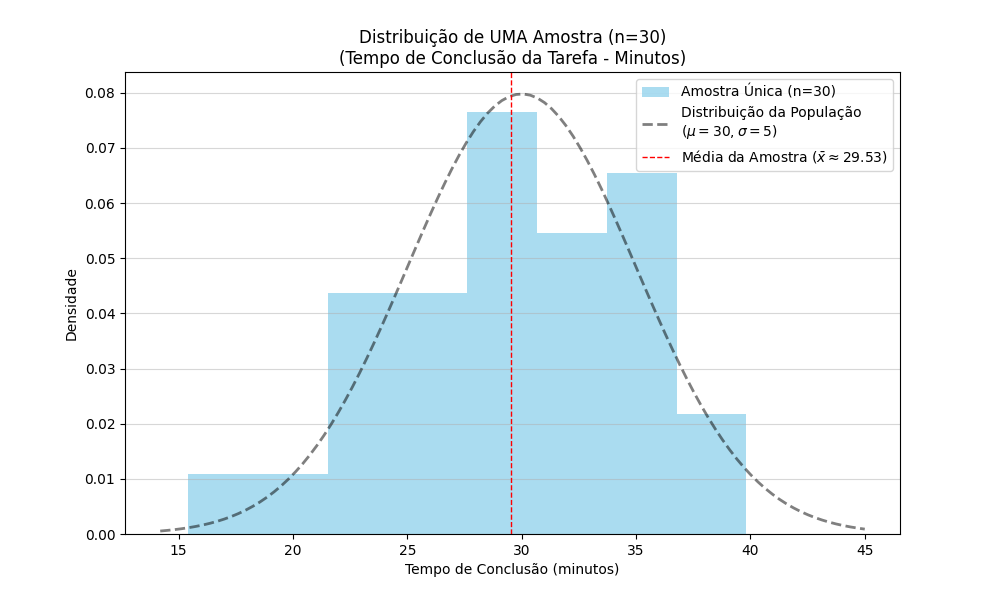

O histograma da amostra é mais irregular que o da população. A média da amostra ( 
x
ˉ
 ≈28.73) não é exatamente igual à média da população (μ=30), e o desvio padrão da amostra (s≈4.61) também difere do populacional (σ=5). Isso é esperado devido à variabilidade amostral. A distribuição da amostra descreve apenas estes 30 pontos de dados.

Agora, o conceito chave: a distribuição amostral. Ela não descreve os valores individuais, mas sim a distribuição de uma estatística amostral (como a média) se coletássemos muitas amostras da mesma população.

Vamos simular a coleta de, digamos, 10.000 amostras, cada uma com tamanho n=30. Para cada amostra, calcularemos a média ( 
x
ˉ
 ). A distribuição dessas médias é a distribuição amostral da média.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import pandas as pd

# Parâmetros da População
pop_mean = 30  # mu
pop_std_dev = 5 # sigma
population_size = 100000

# Gerar a população artificial
np.random.seed(42) # Para reprodutibilidade
population_times = np.random.normal(loc=pop_mean, scale=pop_std_dev, size=population_size)

# Plotar a distribuição da população
plt.figure(figsize=(10, 6))
plt.hist(population_times, bins=50, density=True, alpha=0.7, color='gray', label=f'População (N={population_size})')
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x, pop_mean, pop_std_dev)
plt.plot(x, p, 'k', linewidth=2, label=f'Distribuição Normal Teórica\n($\mu={pop_mean}, \sigma={pop_std_dev}$)')
plt.title('Distribuição da População Artificial\n(Tempo de Conclusão da Tarefa - Minutos)')
plt.xlabel('Tempo de Conclusão (minutos)')
plt.ylabel('Densidade de Probabilidade')
plt.legend()
plt.grid(axis='y', alpha=0.5)
plt.show()

print(f"Média da População Simulada: {np.mean(population_times):.4f} (Esperado: {pop_mean})")
print(f"Desvio Padrão da População Simulada: {np.std(population_times):.4f} (Esperado: {pop_std_dev})")

# Tamanho da amostra
sample_size = 30 # n

# Retirar uma amostra aleatória da população
np.random.seed(1) # Semente diferente para a amostragem
sample_times = np.random.choice(population_times, size=sample_size, replace=False)

# Calcular estatísticas da amostra
sample_mean = np.mean(sample_times)
sample_std_dev = np.std(sample_times, ddof=1) # Usar ddof=1 para desvio padrão amostral (s)

# Plotar a distribuição da amostra
plt.figure(figsize=(10, 6))
plt.hist(sample_times, bins=8, density=True, alpha=0.7, color='skyblue', label=f'Amostra Única (n={sample_size})')
# Sobrepor a curva da população para comparação
xmin, xmax = plt.xlim()
x = np.linspace(min(xmin, pop_mean - 3*pop_std_dev), max(xmax, pop_mean + 3*pop_std_dev), 100)
p = stats.norm.pdf(x, pop_mean, pop_std_dev)
plt.plot(x, p, 'k--', linewidth=2, alpha=0.5, label=f'Distribuição da População\n($\mu={pop_mean}, \sigma={pop_std_dev}$)')

plt.title(f'Distribuição de UMA Amostra (n={sample_size})\n(Tempo de Conclusão da Tarefa - Minutos)')
plt.xlabel('Tempo de Conclusão (minutos)')
plt.ylabel('Densidade')
plt.legend()
plt.grid(axis='y', alpha=0.5)
plt.axvline(sample_mean, color='red', linestyle='dashed', linewidth=1, label=f'Média da Amostra ($\\bar{{x}} \\approx {sample_mean:.2f}$)')
plt.legend()
plt.show()

print(f"\nResultados da Amostra Única (n={sample_size}):")
print(f"Média da Amostra (x_bar): {sample_mean:.4f}")
print(f"Desvio Padrão da Amostra (s): {sample_std_dev:.4f}")
print("Tempos da Amostra:", np.round(sample_times, 2))

# Número de amostras a serem retiradas para construir a distribuição amostral
num_samples = 10000
sample_size = 30 # n (mesmo tamanho de amostra anterior)

# Armazenar as médias de cada amostra
sample_means = []

# Simular a coleta de muitas amostras e o cálculo de suas médias
for _ in range(num_samples):
    sample = np.random.choice(population_times, size=sample_size, replace=False)
    sample_mean_i = np.mean(sample)
    sample_means.append(sample_mean_i)

# Calcular a média das médias amostrais e o desvio padrão das médias amostrais (Erro Padrão)
mean_of_sample_means = np.mean(sample_means)
std_dev_of_sample_means = np.std(sample_means) # Erro Padrão calculado da simulação

# Calcular o Erro Padrão teórico (SE)
theoretical_se = pop_std_dev / np.sqrt(sample_size)

# Plotar a distribuição amostral das médias
plt.figure(figsize=(10, 6))
plt.hist(sample_means, bins=50, density=True, alpha=0.7, color='lightgreen', label=f'Distribuição Amostral das Médias\n({num_samples} amostras de n={sample_size})')

# Sobrepor a curva Normal teórica da distribuição amostral (Teorema Central do Limite)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
# A média da distribuição amostral é a média da população (mu)
# O desvio padrão da distribuição amostral é o Erro Padrão (sigma / sqrt(n))
p_sampling = stats.norm.pdf(x, pop_mean, theoretical_se)
plt.plot(x, p_sampling, 'k', linewidth=2, label=f'Distribuição Normal Teórica\n($\mu_{{\\bar{{X}}}}={pop_mean}, \sigma_{{\\bar{{X}}}}={theoretical_se:.2f}$)')

plt.title('Distribuição Amostral das Médias ($\overline{X}$)\n(Tempo de Conclusão da Tarefa - Minutos)')
plt.xlabel('Média Amostral do Tempo de Conclusão ($\overline{x}$)')
plt.ylabel('Densidade de Probabilidade')
plt.axvline(mean_of_sample_means, color='blue', linestyle='dashed', linewidth=1, label=f'Média das Médias Amostrais $\\approx {mean_of_sample_means:.2f}$')
plt.legend()
plt.grid(axis='y', alpha=0.5)
plt.show()

print(f"\nResultados da Distribuição Amostral (baseada em {num_samples} amostras de n={sample_size}):")
print(f"Média das Médias Amostrais: {mean_of_sample_means:.4f} (Esperado: {pop_mean})")
print(f"Desvio Padrão das Médias Amostrais (Erro Padrão Simulado): {std_dev_of_sample_means:.4f}")
print(f"Erro Padrão Teórico (sigma / sqrt(n)): {theoretical_se:.4f}")

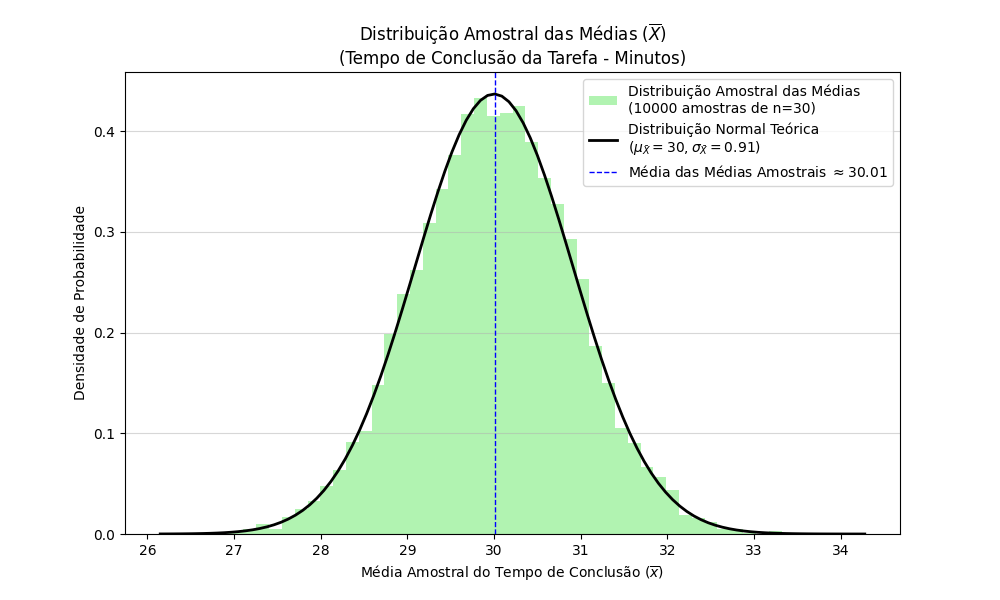

A distribuição amostral das médias é visivelmente Normal, mesmo que cada amostra individual possa ser irregular. Isso é o Teorema Central do Limite (TCL) em ação.
A média das médias amostrais (≈30.00) é extremamente próxima da média populacional (μ=30).
O desvio padrão das médias amostrais (o Erro Padrão, SE≈0.91) é muito próximo do valor teórico σ/ 
n=5/ 30 ≈ 0.9129.
A distribuição amostral é muito mais estreita que a distribuição da população ou da amostra individual. Ela descreve a precisão da média amostral como uma estimativa da média populacional.

Em resumo, a Distribuição da População representa a variabilidade da variável em toda a população, seguindo uma distribuição normal com média (μ=30) e desvio padrão (σ=5). A Distribuição da Amostra exibe a variabilidade da variável em uma única amostra, refletindo a população, mas com alguma variação devido ao ruído. Já a Distribuição Amostral refere-se à distribuição das médias de várias amostras de mesmo tamanho. Tendencialmente normal, com média igual à da população e desvio padrão reduzido (Erro Padrão) conforme o Teorema Central do Limite (TCL), ela é calculada a partir de muitas amostras de mesmo tamanho (histograma dos 10.000 sample_means). É aproximadamente Normal com média μ e desvio padrão σ/n(Erro Padrão), devido ao TCL.